In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [4]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [5]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [6]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [7]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [8]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [9]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [10]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [11]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [12]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [22]:
# Initializing parameters
epochs = 20
batch_size = 16
n_hidden = 32

In [14]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [17]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [18]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

In [ ]:
#http://maxpumperla.com/hyperas/
'''
from __future__ import print_function
import numpy as np

from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform


def create_model(X_train, y_train, X_test, y_test):
    
    epochs = 8
    batch_size = 32
    timesteps = x_train.shape[1]
    input_dim = len(x_train[0][0])
    n_classes = 6
    
    model = Sequential()
    
    model.add(LSTM({{choice([64,32, 16])}}, return_sequences = True, input_shape = (timesteps, input_dim)))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(LSTM({{choice([32, 16])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(n_classes, activation='sigmoid'))
    
    print(model.summary())
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    result = model.fit(X_train, y_train, batch_size = batch_size, epochs=epochs, verbose=2, validation_split=0.01)
    
    validation_acc = np.amax(result.history['val_acc']) 
    
    print('Best validation acc of epoch:', validation_acc)
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}'''

In [ ]:
'''best_run, best_model = optim.minimize(model=create_model, data=load_data(), algo=tpe.suggest, max_evals=4, trials=Trials())
X_train, y_train, X_test, y_test = load_data()

score = best_model.evaluate(X_test, y_test)

print('---------------------')
print('|      Accuracy      |')
print('---------------------')
acc = np.round((score[1]*100), 2)
print(str(acc)+"%\n")
    
print('----------------------------------')
print('|      Best Hyper-Parameters      |')
print('----------------------------------')
print(best_run)
print("\n\n")

true_labels = [np.argmax(i)+1 for i in y_test]
predicted_probs = best_model.predict(X_test)
predicted_labels = [np.argmax(i)+1 for i in predicted_probs]
print_confusionMatrix(true_labels, predicted_labels)'''

# Model1: 1 LSTM with 32 hidden unit , rmsprop optimizer

In [19]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

W0626 22:24:19.299101  6868 deprecation_wrapper.py:119] From C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 22:24:19.305118  6868 deprecation_wrapper.py:119] From C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 22:24:19.308441  6868 deprecation_wrapper.py:119] From C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0626 22:24:19.699645  6868 deprecation_wrapper.py:119] From C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0626 22:24:19

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

W0626 22:24:23.850056  6868 deprecation_wrapper.py:119] From C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0626 22:24:23.889933  6868 deprecation_wrapper.py:119] From C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [21]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

W0626 22:24:25.472001  6868 deprecation.py:323] From C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 77s 10ms/step - loss: 1.3207 - acc: 0.4329 - val_loss: 1.1474 - val_acc: 0.4706
Epoch 2/30
7352/7352 [==============================] - 72s 10ms/step - loss: 0.9877 - acc: 0.5702 - val_loss: 1.0286 - val_acc: 0.5046
Epoch 3/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.7947 - acc: 0.6477 - val_loss: 0.7681 - val_acc: 0.6074
Epoch 4/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.6952 - acc: 0.6578 - val_loss: 0.7221 - val_acc: 0.6060
Epoch 5/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.6491 - acc: 0.6802 - val_loss: 0.7290 - val_acc: 0.6169
Epoch 6/30
7352/7352 [==============================] - 64s 9ms/step - loss: 0.6374 - acc: 0.6857 - val_loss: 1.2811 - val_acc: 0.5877
Epoch 7/30
7352/7352 [==============================] - 65s 9ms/step - loss: 0.6218 - acc: 0.7231 - val_loss: 0.6598 - val_acc: 0.7194
Ep

Test Score: 0.431993
Test Accuracy: 89.379030%


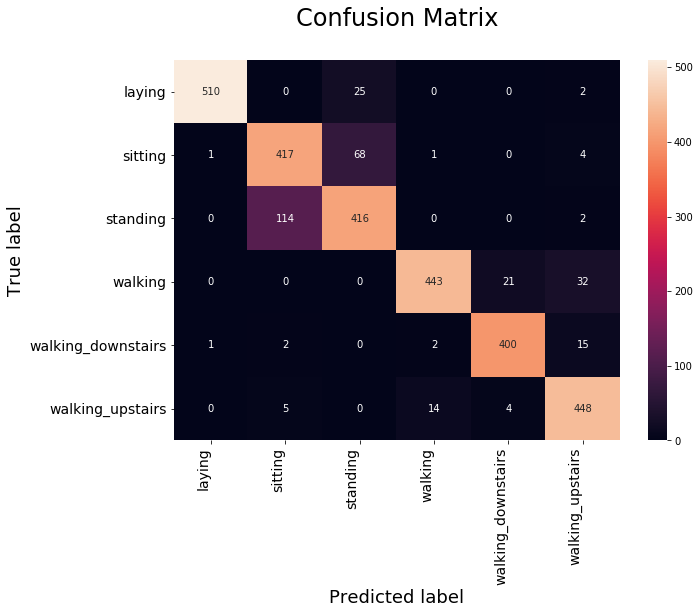

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

- With a simple 1 layer architecture we got 89.34% accuracy and a loss of 0.43
- We can further imporve the performace with Hyperparameter tuning

# Model2: 1 LSTM with 64 hodden unit , adam optimizer

In [24]:
# Initiliazing the sequential model
model2 = Sequential()
# Configuring the parameters
model2.add(LSTM(64, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model2.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model2.add(Dense(n_classes, activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compiling the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
model2.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)




Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 73s 10ms/step - loss: 1.4055 - acc: 0.3928 - val_loss: 1.2250 - val_acc: 0.4326
Epoch 2/20
7352/7352 [==============================] - 73s 10ms/step - loss: 1.2155 - acc: 0.4698 - val_loss: 1.2551 - val_acc: 0.5151
Epoch 3/20
7352/7352 [==============================] - 71s 10ms/step - loss: 1.0704 - acc: 0.5320 - val_loss: 1.0345 - val_acc: 0.4930
Epoch 4/20
7352/7352 [==============================] - 75s 10ms/step - loss: 1.0918 - acc: 0.5222 - val_loss: 1.2427 - val_acc: 0.5134
Epoch 5/20
7352/7352 [==============================] - 74s 10ms/step - loss: 1.1104 - acc: 0.5144 - val_loss: 0.8929 - val_acc: 0.5870
Epoch 6/20
7352/7352 [==============================] - 73s 10ms/step - loss: 0.8779 - acc: 0.6009 - val_loss: 0.8901 - val_acc: 0.5657
Epoch 7/20
7352/7352 [==============================] - 80s 11ms/step - loss: 0.8381 - acc: 0.6034 - val_loss: 0.9905 - val_acc: 0.5704


Test Score: 0.916506
Test Accuracy: 65.218867%


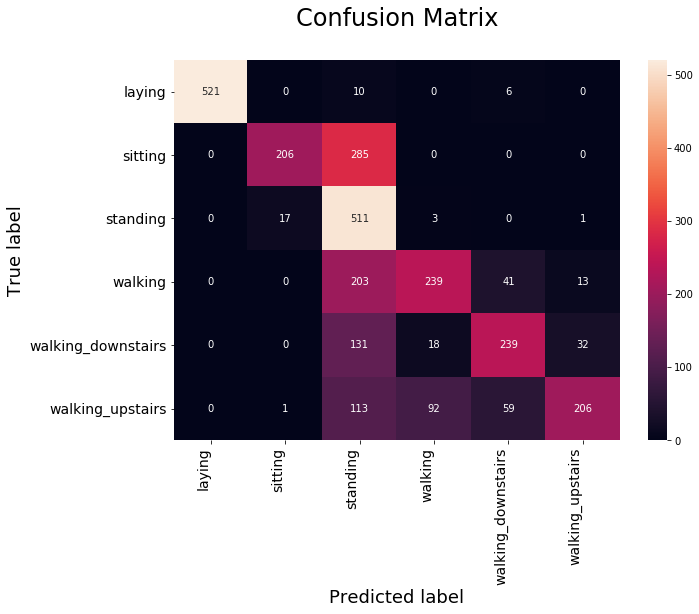

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Final evaluation of the model
scores = model2.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model2.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

it is seen that when i decrease opochs value from 30 to 20, accuracy decrease drastically.

loss also increase significantly in 1 LSTM model

# Model3: 1 LSTM with 64 hodden unit , rmsprop optimizer

In [27]:
# Initiliazing the sequential model
model3 = Sequential()
# Configuring the parameters
model3.add(LSTM(64, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model3.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model3.add(Dense(n_classes, activation='sigmoid'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compiling the model
model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model
model3.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)


Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 76s 10ms/step - loss: 1.2690 - acc: 0.4430 - val_loss: 1.0997 - val_acc: 0.5324
Epoch 2/20
7352/7352 [==============================] - 69s 9ms/step - loss: 0.9841 - acc: 0.5680 - val_loss: 0.8458 - val_acc: 0.6491
Epoch 3/20
7352/7352 [==============================] - 70s 10ms/step - loss: 0.8499 - acc: 0.6334 - val_loss: 1.0590 - val_acc: 0.5127
Epoch 4/20
7352/7352 [==============================] - 72s 10ms/step - loss: 0.6973 - acc: 0.7001 - val_loss: 0.7259 - val_acc: 0.7038
Epoch 5/20
7352/7352 [==============================] - 75s 10ms/step - loss: 0.5915 - acc: 0.7455 - val_loss: 0.5523 - val_acc: 0.7608
Epoch 6/20
7352/7352 [==============================] - 71s 10ms/step - loss: 0.4976 - acc: 0.8048 - val_loss: 0.5066 - val_acc: 0.8001
Epoch 7/20
7352/7352 [==============================] - 70s 10ms/step - loss: 0.3891 - acc: 0.8637 - val_loss: 0.4102 - val_acc: 0.8578
E

Test Score: 0.466954
Test Accuracy: 89.820156%


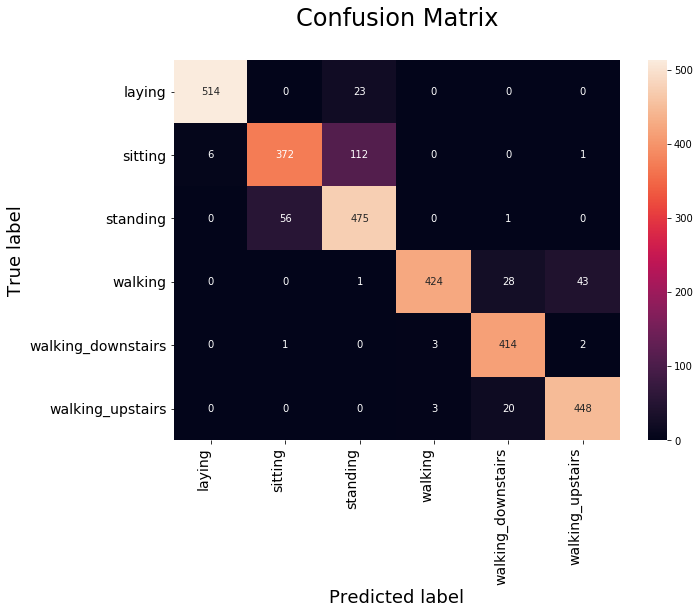

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Final evaluation of the model
scores = model3.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model3.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

RMSProp optimizer is suitable for this problem. accuracy again reach to 89%

loss also decrease from 0.9 to 0.46

let check with 2 LSTM network...

# Model4: 2 LSTM with 32 hidden unit , adam optimizer

In [30]:
# Initiliazing the sequential model
model4 = Sequential()
# Configuring the parameters
model4.add(LSTM(32,return_sequences=True, input_shape=(timesteps, input_dim)))
model4.add(Dropout(0.5))

# Configuring the parameters
model4.add(LSTM(32))
model4.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model4.add(Dense(n_classes, activation='sigmoid'))
print(model4.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# Compiling the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
model4.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 137s 19ms/step - loss: 1.2312 - acc: 0.4869 - val_loss: 0.9302 - val_acc: 0.6210
Epoch 2/20
7352/7352 [==============================] - 130s 18ms/step - loss: 0.8336 - acc: 0.6080 - val_loss: 0.7768 - val_acc: 0.6206
Epoch 3/20
7352/7352 [==============================] - 5732s 780ms/step - loss: 0.7795 - acc: 0.6174 - val_loss: 0.7749 - val_acc: 0.6430
Epoch 4/20
7352/7352 [==============================] - 129s 18ms/step - loss: 0.8037 - acc: 0.6049 - val_loss: 0.7544 - val_acc: 0.5969
Epoch 5/20
7352/7352 [==============================] - 1588s 216ms/step - loss: 0.7207 - acc: 0.6138 - val_loss: 0.6889 - val_acc: 0.6125
Epoch 6/20
7352/7352 [==============================] - 120s 16ms/step - loss: 0.7499 - acc: 0.5962 - val_loss: 0.7753 - val_acc: 0.5419
Epoch 7/20
7352/7352 [==============================] - 134s 18ms/step - loss: 0.7406 - acc: 0.5967 - val_loss: 0.7400 - val_a

Test Score: 0.461573
Test Accuracy: 86.257211%


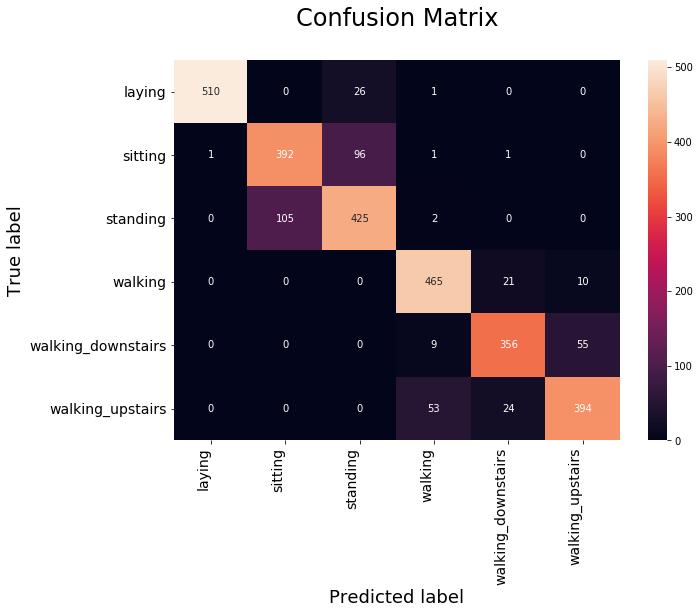

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Final evaluation of the model
scores = model4.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model4.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# Model5: 2 LSTM with 64 hidden unit , adam optimizer

In [33]:
# Initiliazing the sequential model
model5 = Sequential()
# Configuring the parameters
model5.add(LSTM(64,return_sequences=True, input_shape=(timesteps, input_dim)))
model5.add(Dropout(0.5))

# Configuring the parameters
model5.add(LSTM(32))
model5.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model5.add(Dense(n_classes, activation='sigmoid'))
print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
# Compiling the model
model5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
model5.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 134s 18ms/step - loss: 1.4015 - acc: 0.4169 - val_loss: 1.2836 - val_acc: 0.4564
Epoch 2/20
7352/7352 [==============================] - 128s 17ms/step - loss: 1.2390 - acc: 0.4407 - val_loss: 1.2479 - val_acc: 0.4164
Epoch 3/20
7352/7352 [==============================] - 125s 17ms/step - loss: 1.2551 - acc: 0.4348 - val_loss: 1.4182 - val_acc: 0.3488
Epoch 4/20
7352/7352 [==============================] - 120s 16ms/step - loss: 1.1706 - acc: 0.4937 - val_loss: 1.0925 - val_acc: 0.5643
Epoch 5/20
7352/7352 [==============================] - 127s 17ms/step - loss: 0.9595 - acc: 0.5817 - val_loss: 1.3757 - val_acc: 0.4147
Epoch 6/20
7352/7352 [==============================] - 154s 21ms/step - loss: 1.0993 - acc: 0.5267 - val_loss: 0.9664 - val_acc: 0.5711
Epoch 7/20
7352/7352 [==============================] - 146s 20ms/step - loss: 0.9192 - acc: 0.6043 - val_loss: 1.1931 - val_acc: 

Test Score: 0.707013
Test Accuracy: 62.538174%


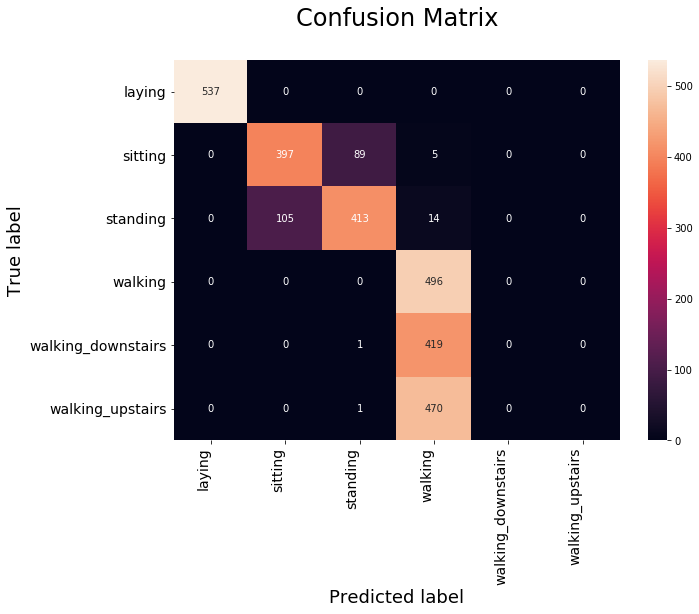

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Final evaluation of the model
scores = model5.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model5.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# Model6: 2 LSTM with 64 hidden unit , rmsprop optimizer

In [36]:
# Initiliazing the sequential model
model6 = Sequential()
# Configuring the parameters
model6.add(LSTM(64,return_sequences=True, input_shape=(timesteps, input_dim)))
model6.add(Dropout(0.5))

# Configuring the parameters
model6.add(LSTM(32))
model6.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model6.add(Dense(n_classes, activation='sigmoid'))
print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Compiling the model
model6.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model
model6.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 134s 18ms/step - loss: 1.2233 - acc: 0.4961 - val_loss: 0.9743 - val_acc: 0.5986
Epoch 2/20
7352/7352 [==============================] - 130s 18ms/step - loss: 0.8135 - acc: 0.6517 - val_loss: 0.7748 - val_acc: 0.7197
Epoch 3/20
7352/7352 [==============================] - 128s 17ms/step - loss: 0.6675 - acc: 0.7274 - val_loss: 0.6315 - val_acc: 0.7913
Epoch 4/20
7352/7352 [==============================] - 135s 18ms/step - loss: 0.4925 - acc: 0.8443 - val_loss: 0.5876 - val_acc: 0.8005
Epoch 5/20
7352/7352 [==============================] - 121s 16ms/step - loss: 0.3329 - acc: 0.9048 - val_loss: 0.4312 - val_acc: 0.8663
Epoch 6/20
7352/7352 [==============================] - 125s 17ms/step - loss: 0.2665 - acc: 0.9253 - val_loss: 0.3789 - val_acc: 0.8873
Epoch 7/20
7352/7352 [==============================] - 122s 17ms/step - loss: 0.2311 - acc: 0.9271 - val_loss: 0.4710 - val_acc: 

Test Score: 0.451065
Test Accuracy: 90.634544%


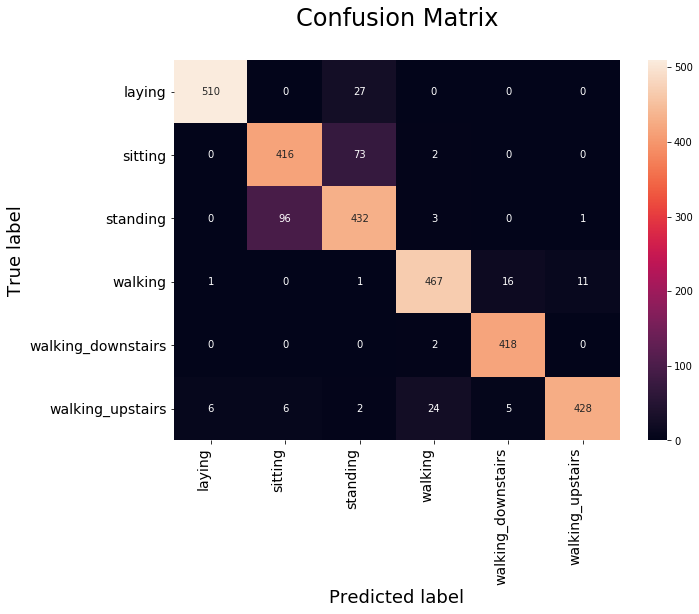

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Final evaluation of the model
scores = model6.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model6.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

Observation:
    
    test accuracy reach upto 90.0 % with 2 LSTM Layer and rmsprop optimizer.
    
    loss is 0.45.

# Overall Observation:

For this problem, require optimal parameters are........

2 LSTM model,

rmsprop optimizer, 

64 hidden unit

